## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [4]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

In [5]:
from sklearn.feature_selection import SelectFromModel

In [6]:
import shap 

In [7]:
np.random.seed(42)
shap.initjs()

## 2. Load Data

In [8]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
train_df, test_df = train_test_split(df, train_size=0.7, random_state=123)
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


## 3. EDA

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

From this we can know these insights:
1. There is no missing data so no imputation is needed.
2. The categorical features is mixed with numerical features with their data type being int64. We need to handle numeric scaling and categorical encoding separately when working on preprocessing.

In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14962.348238,8650.734050,1.0,7498.75,14960.5,22458.25,30000.0
LIMIT_BAL,21000.0,167880.651429,130202.682167,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,21000.0,1.600762,0.489753,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.852143,0.792961,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.554000,0.521675,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.500810,9.212644,21.0,28.00,34.0,41.00,79.0
PAY_0,21000.0,-0.015429,1.120465,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.137095,1.194506,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.171619,1.196123,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.225238,1.168556,-2.0,-1.00,0.0,0.00,8.0


From this we can get these insights:
1. `default.payment.next.month` has a mean of 0.226, meaning about 22.6% of clients default, showing class imbalance.
2. `PAY_0` to `PAY_6` means are all negative, suggesting most users pay on schedule or have small delays.

In [12]:
train_df.groupby('SEX')['default.payment.next.month'].mean(), train_df.groupby('EDUCATION')['default.payment.next.month'].mean()

(SEX
 1    0.246899
 2    0.207514
 Name: default.payment.next.month, dtype: float64,
 EDUCATION
 0    0.000000
 1    0.197498
 2    0.235456
 3    0.258782
 4    0.061728
 5    0.071429
 6    0.142857
 Name: default.payment.next.month, dtype: float64)

Both `SEX` and `EDUCATION` show meaningful differences in `default.payment.next.month`, so they are informative categorical features for modeling.

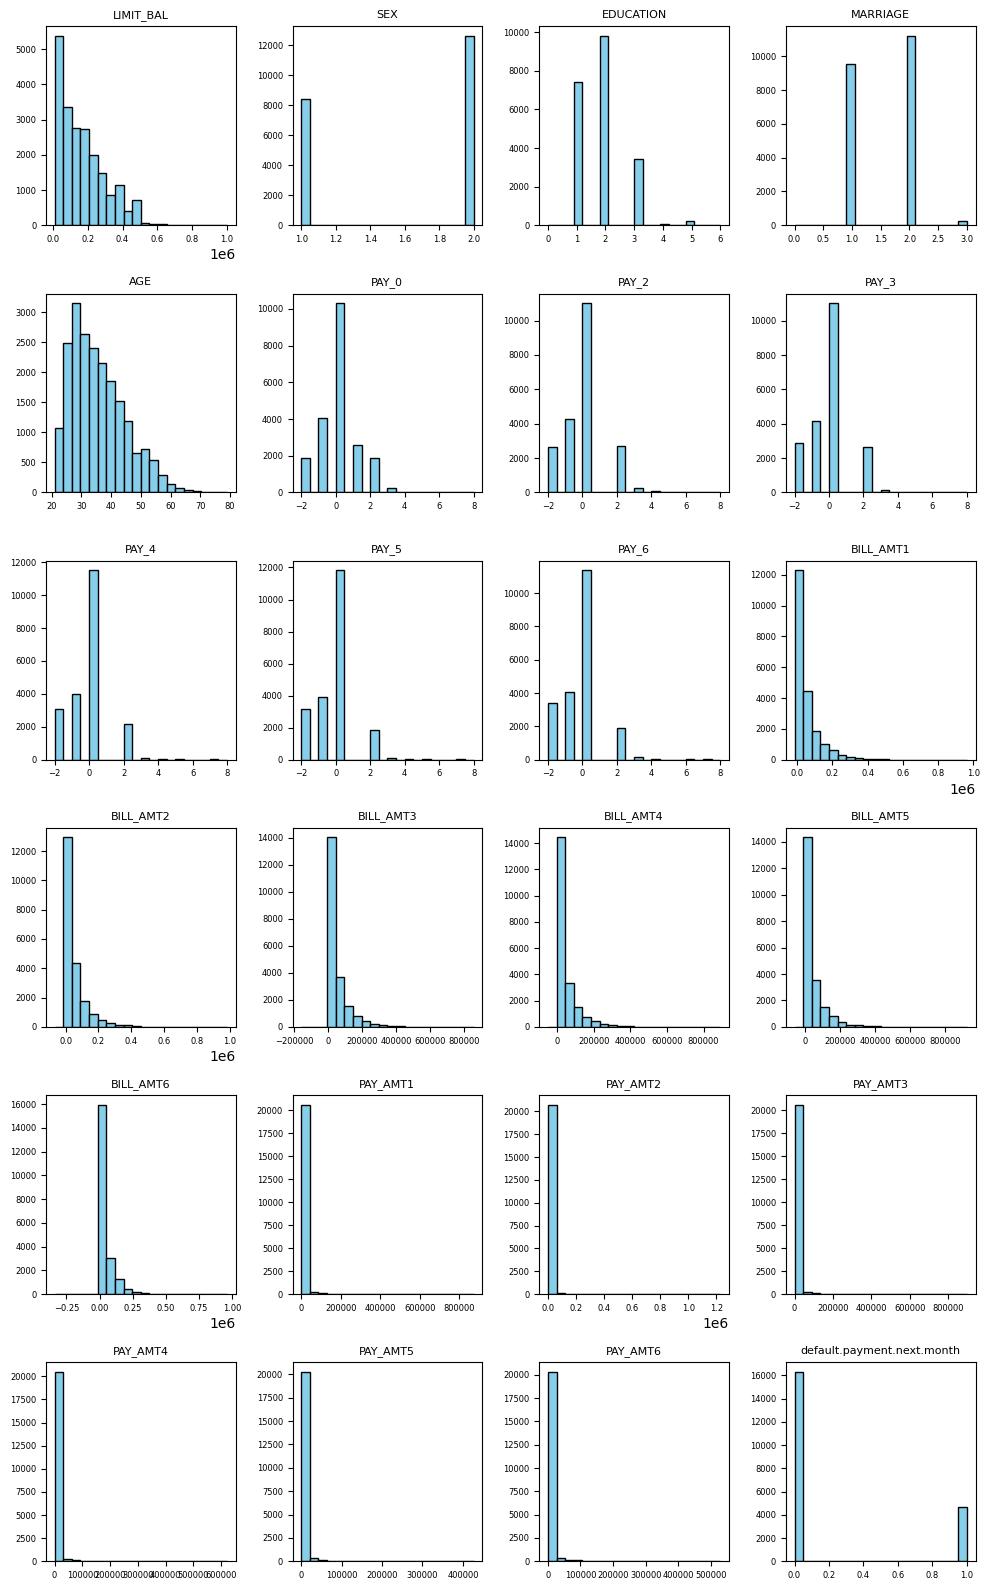

In [13]:
# ChatGPT-5 help me find the proper functions based on my description.
# It also helps me debug and make the code run.
fig, axs = plt.subplots(6, 4, figsize=(10, 16)) # Creates a figure with a grid of 6 rows × 4 columns = 24 subplots
axs = axs.flatten() # Converts the 2D array of axes into a 1D array for easier iteration
for ax, col in zip(axs, [col for col in train_df.columns if (col != 'ID')]):
    ax.hist(train_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=8)
    # ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout() # ChatGPT-5 tells me to add this to avoid overlap
plt.show()

1. Some of the features, like those `PAY_AMT`s, are mainly focus around 0.
2. The features ranges very differently, some scaling and standarize may be needed.

In [14]:
categorical_features = ["EDUCATION", "MARRIAGE"]

numeric_features = [
    "LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"
]

In [15]:
# I learn this from STAT 200
Q1 = train_df[numeric_features].quantile(0.25)
Q3 = train_df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((train_df[numeric_features] < (Q1 - 1.5 * IQR)) |
                (train_df[numeric_features] > (Q3 + 1.5 * IQR)))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print(outlier_counts)

PAY_2        3054
PAY_3        2919
PAY_4        2424
PAY_0        2186
PAY_6        2133
PAY_5        2095
PAY_AMT4     2071
PAY_AMT6     2062
PAY_AMT5     2025
PAY_AMT1     1924
PAY_AMT2     1922
BILL_AMT5    1896
BILL_AMT6    1871
BILL_AMT4    1829
PAY_AMT3     1818
BILL_AMT3    1739
BILL_AMT2    1680
BILL_AMT1    1672
AGE           195
LIMIT_BAL     110
dtype: int64


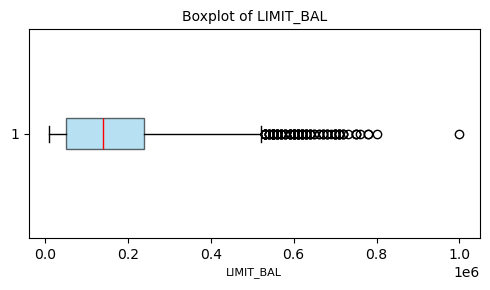

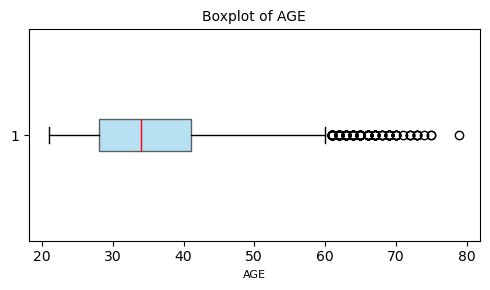

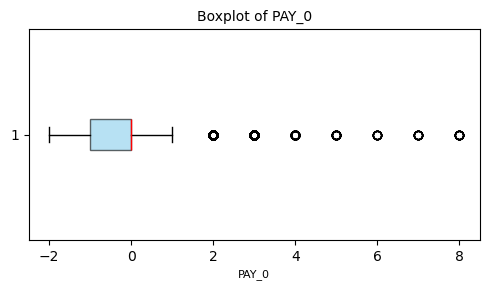

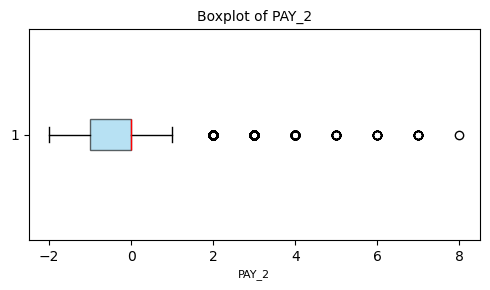

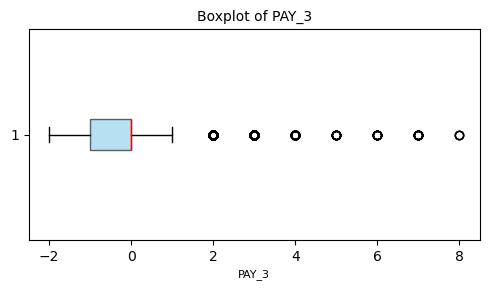

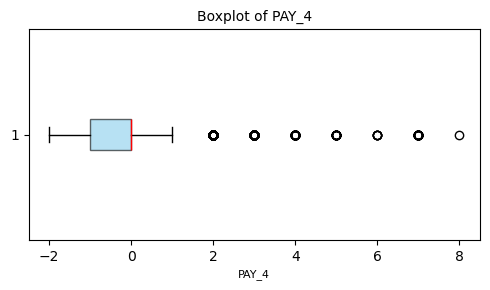

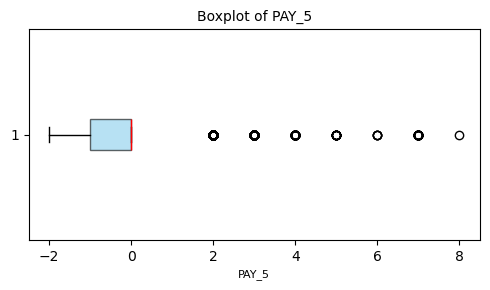

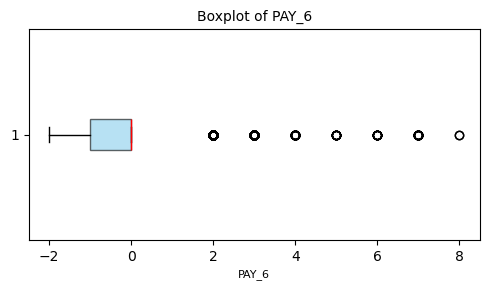

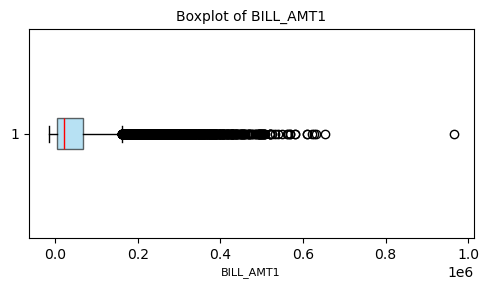

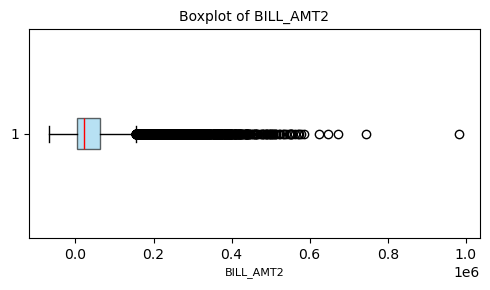

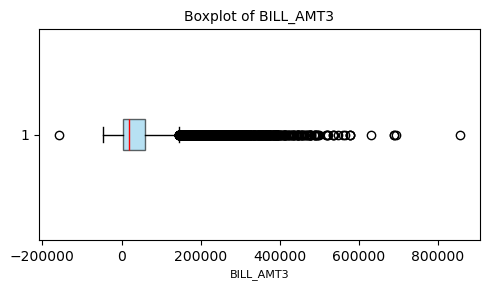

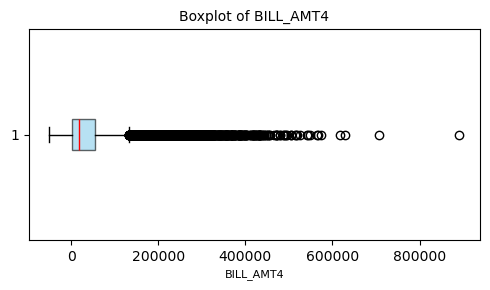

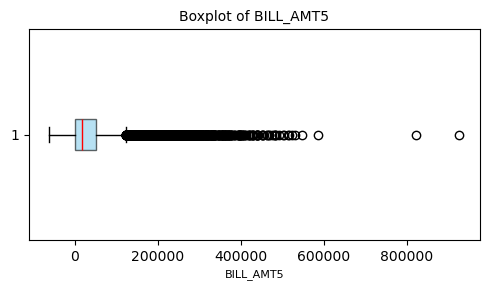

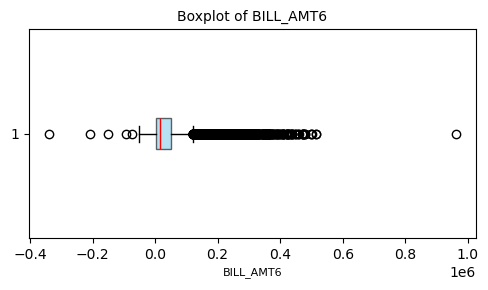

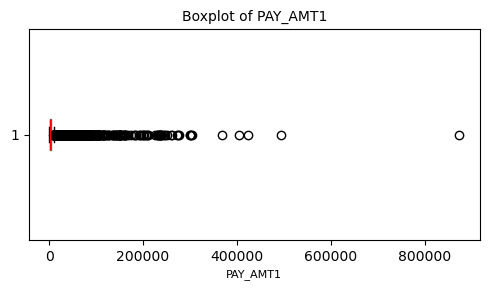

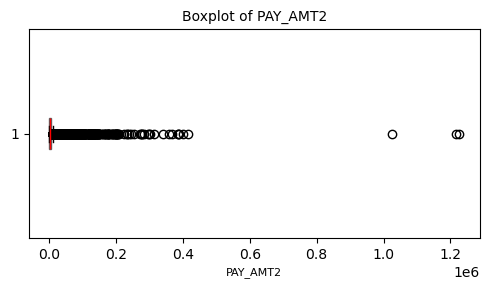

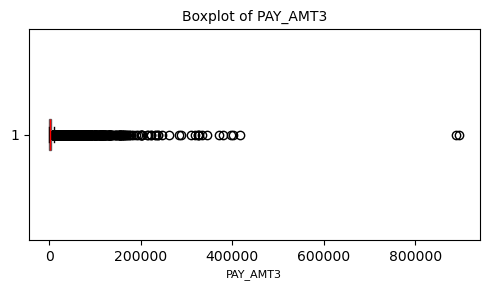

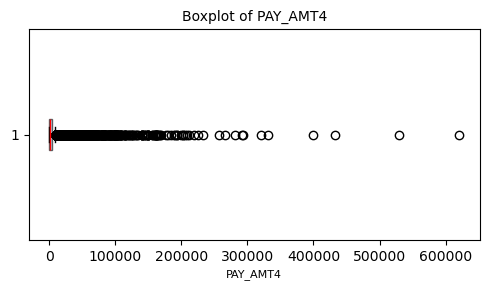

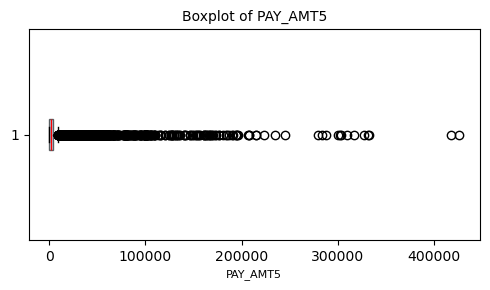

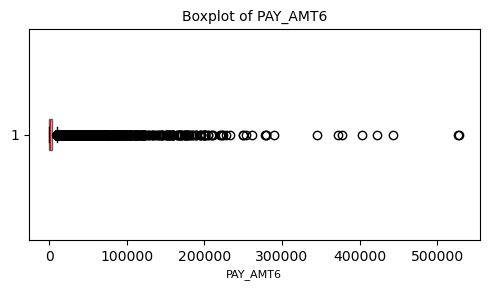

In [16]:
# ChatGPT-5 helps me add these parameters to make the plot looks prettier
for col in numeric_features:
    plt.figure(figsize=(5, 3))
    plt.boxplot(train_df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', alpha=0.6),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.tight_layout()
    plt.show()


There are quite a few outliers, mainly focused on `Repayment status` and `Amount of bill statement` of different months.

In [17]:
train_df['AVG_UTILIZATION'] = train_df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1) / train_df['LIMIT_BAL']

# -1 is a special category in `PAYs`: it means "pay duly", while all others means payment delay.
# Grouping others together as well as 
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
# (train_df[pay_cols] > 0) performs an elementwise comparison across the specified columns.
train_df['DELAY_COUNT'] = (train_df[pay_cols] > 0).sum(axis=1) # train_df[train_df[pay_cols] > 0].sum(axis=1)

# Calculating the std of the PAY_AMT can reflect people's financial stability
train_df['PAY_STD'] = train_df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)

train_df.head().columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'AVG_UTILIZATION', 'DELAY_COUNT',
       'PAY_STD'],
      dtype='object')

In [18]:
categorical_features = ["EDUCATION", "MARRIAGE"]

numeric_features = [
    "LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6",
    "AVG_UTILIZATION","DELAY_COUNT","PAY_STD"
]

binary_features = ["SEX"]
drop_features = ["ID"]
target_column = "default.payment.next.month"

In [19]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['AVG_UTILIZATION'] = X[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1) / X['LIMIT_BAL']
        X['DELAY_COUNT'] = (X[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] > 0).sum(axis=1)
        X['PAY_STD'] = X[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)
        return X

In [20]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),  # OHE on categorical features
    ("drop", drop_features),  # drop the drop features
)

In [21]:
preprocess_pipeline = make_pipeline(
    FeatureEngineer(),
    preprocessor
)

preprocess_pipeline

,steps,"[('featureengineer', ...), ('columntransformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder-1', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 4. Baseline model

In [22]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results_dict = {}  # dictionary to store our results for different models

scoring_metric = "roc_auc"

In [23]:
X_train, y_train = (
    train_df.drop(columns = [target_column]),
    train_df[target_column],
)

X_test, y_test = (
    test_df.drop(columns = [target_column]),
    test_df[target_column],
)

In [24]:
dummy = DummyClassifier(strategy="most_frequent")
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results_dict)

C:\Users\David\AppData\Local\Temp\ipykernel_1564\1725389287.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,dummy
fit_time,0.002 (+/- 0.000)
score_time,0.003 (+/- 0.003)
test_score,0.500 (+/- 0.000)
train_score,0.500 (+/- 0.000)


The baseline dummy classifier, which always predicts the majority class, achieves a score of 0.500 on both training and validation sets when using auc roc as the scoring matrix, with negligible variance.

## 5. Linear models 

The logistic regression improves over the baseline by roughly 51.8% when using auc roc.

The logistic regression do not seems to be significantly improved after hyperparameter tuning of logistic regression. It may be because the default value of hyperparemeter already near the best hyperparameter.

The std score of the logistic regression before and after tuning are both relatively low (smaller than 0.01), showing the result is stable.

In [25]:
pipe_logistic = make_pipeline(
    preprocess_pipeline, LogisticRegression(max_iter=500)
)

results_dict["LogisticRegression"] = mean_std_cross_val_scores(pipe_logistic, X_train, y_train, cv=5, return_train_score=True, scoring = scoring_metric)

pd.DataFrame(results_dict)

C:\Users\David\AppData\Local\Temp\ipykernel_1564\1725389287.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,dummy,LogisticRegression
fit_time,0.002 (+/- 0.000),0.078 (+/- 0.008)
score_time,0.003 (+/- 0.003),0.009 (+/- 0.000)
test_score,0.500 (+/- 0.000),0.760 (+/- 0.009)
train_score,0.500 (+/- 0.000),0.762 (+/- 0.002)


In [26]:
param_dist = {"logisticregression__C": np.logspace(-3, 3, 100)}

random_search = RandomizedSearchCV(
    pipe_logistic, 
    param_distributions=param_dist, 
    n_iter=20,
    n_jobs = -1,
    random_state = 123
)

random_search.fit(X_train, y_train)
best_C_tem = random_search.best_params_["logisticregression__C"]

best_C_tem

In [ ]:
# I learn this from after class conversation/Q&A with Varade
C_grid = np.linspace(best_C_tem*0.8, best_C_tem*1.2, 10)
grid_search = GridSearchCV(
    pipe_logistic,
    param_grid={"logisticregression__C": C_grid},
    cv=5
)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_["logisticregression__C"]

best_C

np.float64(1.1914080244559144)

In [ ]:
best_log_pipeline = grid_search.best_estimator_
results_dict["LogisticRegression (C tuned)"] = mean_std_cross_val_scores(best_log_pipeline, X_train, y_train, cv=5, scoring=scoring_metric, return_train_score=True)

pd.DataFrame(results_dict)

C:\Users\David\AppData\Local\Temp\ipykernel_17300\1725389287.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,dummy,LogisticRegression,LogisticRegression (C tuned)
fit_time,0.002 (+/- 0.000),0.079 (+/- 0.012),0.078 (+/- 0.003)
score_time,0.003 (+/- 0.003),0.010 (+/- 0.001),0.009 (+/- 0.001)
test_score,0.500 (+/- 0.000),0.760 (+/- 0.009),0.760 (+/- 0.009)
train_score,0.500 (+/- 0.000),0.762 (+/- 0.002),0.762 (+/- 0.002)


The logistic regression improves over the baseline by roughly 51.8% when using auc roc.

The logistic regression do not seems to be significantly improved after hyperparameter tuning of logistic regression. It may be because the default value of hyperparemeter already near the best hyperparameter.

The std score of the logistic regression before and after tuning are both relatively low (smaller than 0.01), showing the result is stable.

## 5. Different models

**Fit times** 
1. Random Forest is much slower, and Gradient Boosting are slightly slower compared to logistic model.
2. HistGB and LightGBM offer better speed–performance tradeoff.

**Scores**
1. Tree ensembles outperform logistic model.
2. Random Forest and XGBoost show clear overfitting (there is a large train–test gap).
3. GradientBoosting and HistGB have strong validation scores with controlled overfitting.
4. LightGBM and GradientBoosting perform best overall.

In [ ]:
pipe_rf = make_pipeline(
    preprocess_pipeline, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_xgb = make_pipeline(
    preprocess_pipeline,
    XGBClassifier(
        random_state=123, verbosity=0
    ),
)
pipe_lgbm = make_pipeline(
    preprocess_pipeline, LGBMClassifier(random_state=123, verbose=-1)
)

pipe_sklearn_histGB = make_pipeline(
    preprocess_pipeline,
    HistGradientBoostingClassifier(random_state=123),
)

pipe_sklearn_GB = make_pipeline(
    preprocess_pipeline,
    GradientBoostingClassifier(random_state=123),
)

classifiers = {
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "sklearn_histGB": pipe_sklearn_histGB,
    "sklearn_GB": pipe_sklearn_GB,
}

In [ ]:
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
for name, classifier in classifiers.items():
    results_dict[name] = mean_std_cross_val_scores(
        classifier, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )


pd.DataFrame(results_dict)

,dummy,LogisticRegression,LogisticRegression (C tuned),random forest,XGBoost,LightGBM,sklearn_histGB,sklearn_GB
fit_time,0.002 (+/- 0.000),0.079 (+/- 0.012),0.078 (+/- 0.003),3.344 (+/- 0.114),0.151 (+/- 0.002),0.384 (+/- 0.566),0.222 (+/- 0.026),6.315 (+/- 0.016)
score_time,0.003 (+/- 0.003),0.010 (+/- 0.001),0.009 (+/- 0.001),0.061 (+/- 0.002),0.016 (+/- 0.003),0.016 (+/- 0.002),0.019 (+/- 0.001),0.013 (+/- 0.001)
test_score,0.500 (+/- 0.000),0.760 (+/- 0.009),0.760 (+/- 0.009),0.765 (+/- 0.003),0.760 (+/- 0.005),0.778 (+/- 0.006),0.782 (+/- 0.008),0.784 (+/- 0.007)
train_score,0.500 (+/- 0.000),0.762 (+/- 0.002),0.762 (+/- 0.002),1.000 (+/- 0.000),0.970 (+/- 0.003),0.906 (+/- 0.003),0.857 (+/- 0.005),0.813 (+/- 0.003)


In [ ]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.003 (+/- 0.003),0.500 (+/- 0.000),0.500 (+/- 0.000)
LogisticRegression,0.079 (+/- 0.012),0.010 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
LogisticRegression (C tuned),0.078 (+/- 0.003),0.009 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
random forest,3.344 (+/- 0.114),0.061 (+/- 0.002),0.765 (+/- 0.003),1.000 (+/- 0.000)
XGBoost,0.151 (+/- 0.002),0.016 (+/- 0.003),0.760 (+/- 0.005),0.970 (+/- 0.003)
LightGBM,0.384 (+/- 0.566),0.016 (+/- 0.002),0.778 (+/- 0.006),0.906 (+/- 0.003)
sklearn_histGB,0.222 (+/- 0.026),0.019 (+/- 0.001),0.782 (+/- 0.008),0.857 (+/- 0.005)
sklearn_GB,6.315 (+/- 0.016),0.013 (+/- 0.001),0.784 (+/- 0.007),0.813 (+/- 0.003)


**Fit times** 
1. Random Forest is much slower, and Gradient Boosting are slightly slower compared to logistic model.
2. HistGB and LightGBM offer better speed–performance tradeoff.

**Scores**
1. Tree ensembles outperform logistic model.
2. Random Forest and XGBoost show clear overfitting (there is a large train–test gap).
3. GradientBoosting and HistGB have strong validation scores with controlled overfitting.
4. LightGBM and GradientBoosting perform best overall.

## 6. Feature selection

It seems that feature selection only increase the fit time and score time and do not cause significant improvement on the score. I will not keep feature selection in my pipeline.

In [ ]:
# I ask ChatGPT: when using SelectFromModel for a classification problem, what model will usually be put inside SelectFromModel?
# It suggests LogisticRegression(penalty="l1", solver="liblinear")
models = {
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=123),
    "XGBoost": XGBClassifier(random_state=123, verbosity=0),
    "LightGBM": LGBMClassifier(random_state=123, verbose=-1),
    "sklearn_histGB": HistGradientBoostingClassifier(random_state=123),
    "sklearn_GB": GradientBoostingClassifier(random_state=123),
}

for name, model in models.items():
    pipe_select = make_pipeline(
        preprocess_pipeline,
        SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear")),
        model,
    )
    name += " (feature selection)"
    results_dict[name] = mean_std_cross_val_scores(
        pipe_select, X_train, y_train, scoring=scoring_metric, return_train_score=True
    )


In [ ]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.003 (+/- 0.003),0.500 (+/- 0.000),0.500 (+/- 0.000)
LogisticRegression,0.079 (+/- 0.012),0.010 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
LogisticRegression (C tuned),0.078 (+/- 0.003),0.009 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
random forest,3.344 (+/- 0.114),0.061 (+/- 0.002),0.765 (+/- 0.003),1.000 (+/- 0.000)
XGBoost,0.151 (+/- 0.002),0.016 (+/- 0.003),0.760 (+/- 0.005),0.970 (+/- 0.003)
LightGBM,0.384 (+/- 0.566),0.016 (+/- 0.002),0.778 (+/- 0.006),0.906 (+/- 0.003)
sklearn_histGB,0.222 (+/- 0.026),0.019 (+/- 0.001),0.782 (+/- 0.008),0.857 (+/- 0.005)
sklearn_GB,6.315 (+/- 0.016),0.013 (+/- 0.001),0.784 (+/- 0.007),0.813 (+/- 0.003)
random forest (feature selection),3.852 (+/- 0.161),0.061 (+/- 0.001),0.766 (+/- 0.004),1.000 (+/- 0.000)
XGBoost (feature selection),0.674 (+/- 0.236),0.017 (+/- 0.002),0.760 (+/- 0.008),0.970 (+/- 0.002)


It seems that feature selection only increase the fit time and score time and do not cause significant improvement on the score. I will not keep feature selection in my pipeline.

## 7. Hyperparameter optimization

Random forest and LGBM models' performance improved, while histGB model do not significantly improve (
    random forest: 0.765 (+/- 0.003) -> 0.778 (+/- 0.007)
    LightGBM: 0.778 (+/- 0.006) -> 0.782 (+/- 0.007)
    sklearn_histGB: 0.782 (+/- 0.008) -> 0.782 (+/- 0.008)
). 
All models remain a relatively small std, showing the model is stable. 

In [ ]:
# I ask ChatGPT to tell me what parameters each models have
param_dists = {
    "random forest": {
        "randomforestclassifier__n_estimators": [300, 400, 500],
        "randomforestclassifier__max_depth": [4, 8, 12],
    },
    "XGBoost": {
        "xgbclassifier__n_estimators": [400, 600, 800, 1000],
    },
    "LightGBM": {
        "lgbmclassifier__n_estimators": [10, 20, 40, 60, 80, 100],
        "lgbmclassifier__learning_rate": [0.01, 0.05, 0.1],
    },
    "sklearn_histGB": {
        "histgradientboostingclassifier__learning_rate": [0.01, 0.05, 0.1],
    },
    "sklearn_GB": {
        "gradientboostingclassifier__n_estimators": [400, 600, 800, 1000],
    },
}

#### Hyperparameter tuning for Random Forest

In [ ]:
cur_model = "random forest"
param_dist = param_dists[cur_model]

random_search_rf = RandomizedSearchCV(
    make_pipeline(preprocess_pipeline, models[cur_model]),
    param_distributions=param_dist, 
    n_iter=20,
    n_jobs = -1,
    random_state = 123
)

random_search_rf.fit(X_train, y_train)

,estimator,Pipeline(step..._state=123))])
,param_distributions,"{'randomforestclassifier__max_depth': [4, 8, ...], 'randomforestclassifier__n_estimators': [300, 400, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [ ]:
results_dict[cur_model + " (tuned)"] = mean_std_cross_val_scores(random_search_rf.best_estimator_, X_train, y_train, cv=5, scoring=scoring_metric, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.003 (+/- 0.003),0.500 (+/- 0.000),0.500 (+/- 0.000)
LogisticRegression,0.079 (+/- 0.012),0.010 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
LogisticRegression (C tuned),0.078 (+/- 0.003),0.009 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
random forest,3.344 (+/- 0.114),0.061 (+/- 0.002),0.765 (+/- 0.003),1.000 (+/- 0.000)
XGBoost,0.151 (+/- 0.002),0.016 (+/- 0.003),0.760 (+/- 0.005),0.970 (+/- 0.003)
LightGBM,0.384 (+/- 0.566),0.016 (+/- 0.002),0.778 (+/- 0.006),0.906 (+/- 0.003)
sklearn_histGB,0.222 (+/- 0.026),0.019 (+/- 0.001),0.782 (+/- 0.008),0.857 (+/- 0.005)
sklearn_GB,6.315 (+/- 0.016),0.013 (+/- 0.001),0.784 (+/- 0.007),0.813 (+/- 0.003)
random forest (feature selection),3.852 (+/- 0.161),0.061 (+/- 0.001),0.766 (+/- 0.004),1.000 (+/- 0.000)
XGBoost (feature selection),0.674 (+/- 0.236),0.017 (+/- 0.002),0.760 (+/- 0.008),0.970 (+/- 0.002)


#### Hyperparameter tuning for LightGBM

In [ ]:
cur_model = "LightGBM"
param_dist = param_dists[cur_model]

random_search_light = RandomizedSearchCV(
    make_pipeline(preprocess_pipeline, models[cur_model]),
    param_distributions=param_dist, 
    n_iter=20,
    n_jobs = -1,
    random_state = 123
)

random_search_light.fit(X_train, y_train)

,estimator,Pipeline(step...verbose=-1))])
,param_distributions,"{'lgbmclassifier__learning_rate': [0.01, 0.05, ...], 'lgbmclassifier__n_estimators': [10, 20, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [ ]:
results_dict[cur_model + " (tuned)"] = mean_std_cross_val_scores(random_search_light.best_estimator_, X_train, y_train, cv=5, scoring=scoring_metric, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.003 (+/- 0.003),0.500 (+/- 0.000),0.500 (+/- 0.000)
LogisticRegression,0.079 (+/- 0.012),0.010 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
LogisticRegression (C tuned),0.078 (+/- 0.003),0.009 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
random forest,3.344 (+/- 0.114),0.061 (+/- 0.002),0.765 (+/- 0.003),1.000 (+/- 0.000)
XGBoost,0.151 (+/- 0.002),0.016 (+/- 0.003),0.760 (+/- 0.005),0.970 (+/- 0.003)
LightGBM,0.384 (+/- 0.566),0.016 (+/- 0.002),0.778 (+/- 0.006),0.906 (+/- 0.003)
sklearn_histGB,0.222 (+/- 0.026),0.019 (+/- 0.001),0.782 (+/- 0.008),0.857 (+/- 0.005)
sklearn_GB,6.315 (+/- 0.016),0.013 (+/- 0.001),0.784 (+/- 0.007),0.813 (+/- 0.003)
random forest (feature selection),3.852 (+/- 0.161),0.061 (+/- 0.001),0.766 (+/- 0.004),1.000 (+/- 0.000)
XGBoost (feature selection),0.674 (+/- 0.236),0.017 (+/- 0.002),0.760 (+/- 0.008),0.970 (+/- 0.002)


Random forest and LGBM models' performance improved, while histGB model do not significantly improve (
    random forest: 0.765 (+/- 0.003) -> 0.778 (+/- 0.007)
    LightGBM: 0.778 (+/- 0.006) -> 0.782 (+/- 0.007)
    sklearn_histGB: 0.782 (+/- 0.008) -> 0.782 (+/- 0.008)
). 
All models remain a relatively small std, showing the model is stable. 

#### Hyperparameter tuning for sklearn_histGB

In [ ]:
cur_model = "sklearn_histGB"
param_dist = param_dists[cur_model]

random_search_hist = RandomizedSearchCV(
    make_pipeline(preprocess_pipeline, models[cur_model]),
    param_distributions=param_dist, 
    n_iter=20,
    n_jobs = -1,
    random_state = 123
)

random_search_hist.fit(X_train, y_train)

,estimator,Pipeline(step..._state=123))])
,param_distributions,"{'histgradientboostingclassifier__learning_rate': [0.01, 0.05, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [ ]:
results_dict[cur_model + " (tuned)"] = mean_std_cross_val_scores(random_search_hist.best_estimator_, X_train, y_train, cv=5, scoring=scoring_metric, return_train_score=True)

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.003 (+/- 0.003),0.500 (+/- 0.000),0.500 (+/- 0.000)
LogisticRegression,0.079 (+/- 0.012),0.010 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
LogisticRegression (C tuned),0.078 (+/- 0.003),0.009 (+/- 0.001),0.760 (+/- 0.009),0.762 (+/- 0.002)
random forest,3.344 (+/- 0.114),0.061 (+/- 0.002),0.765 (+/- 0.003),1.000 (+/- 0.000)
XGBoost,0.151 (+/- 0.002),0.016 (+/- 0.003),0.760 (+/- 0.005),0.970 (+/- 0.003)
LightGBM,0.384 (+/- 0.566),0.016 (+/- 0.002),0.778 (+/- 0.006),0.906 (+/- 0.003)
sklearn_histGB,0.222 (+/- 0.026),0.019 (+/- 0.001),0.782 (+/- 0.008),0.857 (+/- 0.005)
sklearn_GB,6.315 (+/- 0.016),0.013 (+/- 0.001),0.784 (+/- 0.007),0.813 (+/- 0.003)
random forest (feature selection),3.852 (+/- 0.161),0.061 (+/- 0.001),0.766 (+/- 0.004),1.000 (+/- 0.000)
XGBoost (feature selection),0.674 (+/- 0.236),0.017 (+/- 0.002),0.760 (+/- 0.008),0.970 (+/- 0.002)


## 8. Interpretation and feature importances

In [ ]:
preprocess_pipeline.fit(X_train, y_train)
feature_names = preprocessor.get_feature_names_out()


X_train_enc = pd.DataFrame(
    data=preprocess_pipeline.transform(X_train),#.toarray(),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,standardscaler__LIMIT_BAL,standardscaler__AGE,standardscaler__PAY_0,standardscaler__PAY_2,standardscaler__PAY_3,standardscaler__PAY_4,standardscaler__PAY_5,standardscaler__PAY_6,standardscaler__BILL_AMT1,standardscaler__BILL_AMT2,...,onehotencoder-2__EDUCATION_1,onehotencoder-2__EDUCATION_2,onehotencoder-2__EDUCATION_3,onehotencoder-2__EDUCATION_4,onehotencoder-2__EDUCATION_5,onehotencoder-2__EDUCATION_6,onehotencoder-2__MARRIAGE_0,onehotencoder-2__MARRIAGE_1,onehotencoder-2__MARRIAGE_2,onehotencoder-2__MARRIAGE_3
16395,1.168355,0.054187,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21448,2.090017,-0.597108,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20034,-0.060527,0.922579,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,-0.597108,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,-0.905384,2.008070,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_enc = pd.DataFrame(
    data=preprocess_pipeline.transform(X_test),#.toarray(),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.shape

(9000, 35)

In [ ]:
lgbm_pip_tuned = random_search_light.best_estimator_
lgbm_model_tuned = lgbm_pip_tuned.named_steps["lgbmclassifier"]

explainer = shap.TreeExplainer(lgbm_model_tuned) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # test shap values 

In [ ]:
ex1_idx = 10

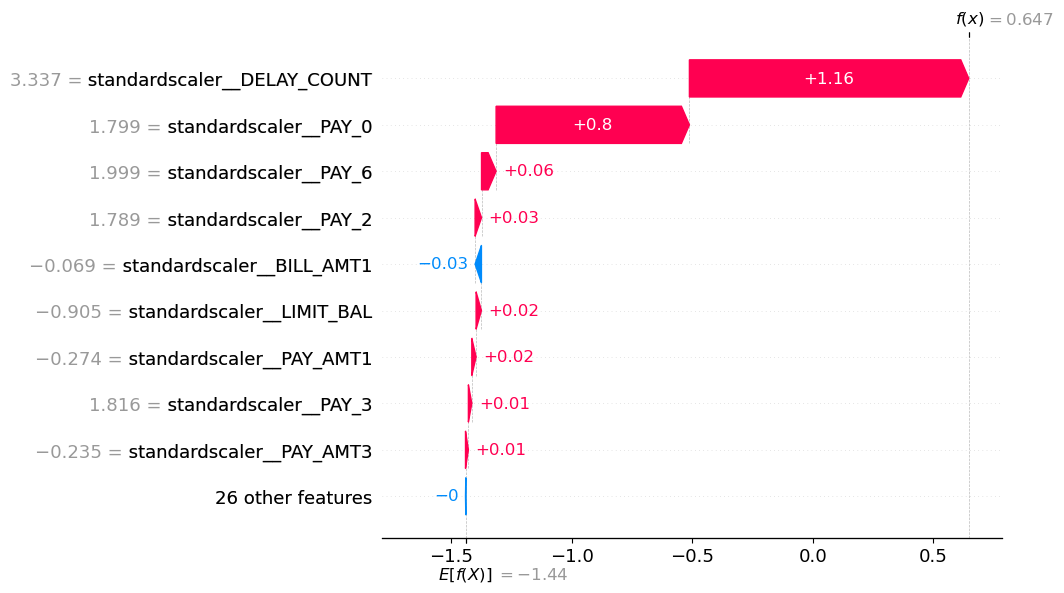

In [ ]:
shap.plots.waterfall(test_shap_values[ex1_idx])

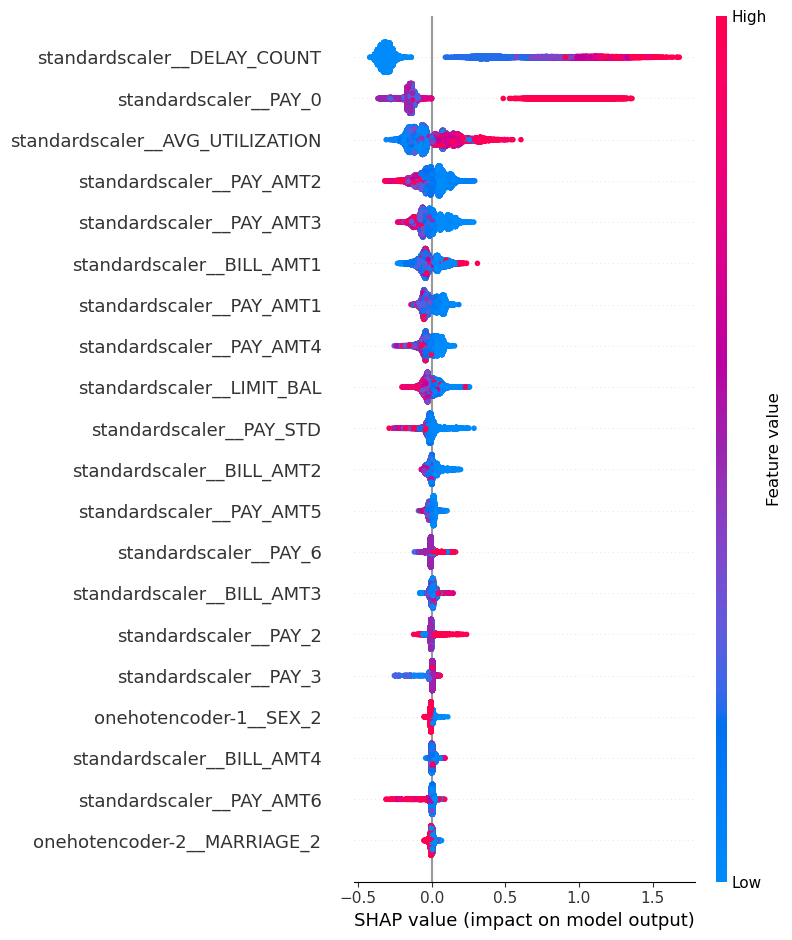

In [ ]:
shap.summary_plot(train_shap_values, X_train_enc)

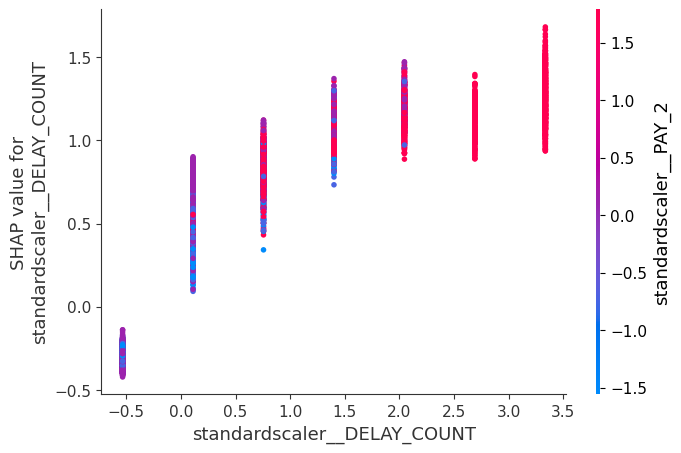

In [ ]:
shap.dependence_plot("standardscaler__DELAY_COUNT", train_shap_values.values, X_train_enc)

From the plot above we can see that the deature we create `standardscaler__DELAY_COUNT` is the most important features.
`standardscaler__PAY_0` and `standardscaler__AVG_UTILICATION` are also quite important features.

The features like `EDUCATION` that I assume will be useful is not important as the plots dipicted. It may be due to the 4, 5, 6 of `EDUCATION` (4=others, 5=unknown, 6=unknown).

## 9. Results on the test set

In [ ]:
y_pred_prob = lgbm_pip_tuned.predict_proba(X_test)[:,1]

roc = roc_auc_score(y_test, y_pred_prob)
pr  = average_precision_score(y_test, y_pred_prob)

print("Test ROC AUC:", roc)
print("Test PR AUC:", pr)

Test ROC AUC: 0.7802612683020007
Test PR AUC: 0.5380733744744411


In [ ]:
validation_roc_auc = random_search_light.best_score_

validation_roc_auc, validation_roc_auc - roc

(np.float64(0.8202380952380952), np.float64(0.0399768269360945))

The best model achieved a validation ROC AUC of 0.820 during cross-validation and a test ROC AUC of 0.780.
This may suggest some degree of overfitting to the cross-validation folds during hyperparameter tuning. Although the test ROC AUC (0.78) is reasonably close to the validation AUC, the PR AUC (0.54) reveals weaker performance on the minority positive class. This suggests that relying only on ROC AUC would give an overly optimistic view of model quality. The drop in PR AUC implies that the model still misses many true positive cases. Therefore, the results are only partially trustworthy, and some optimization bias may still be present. (ChatGPT is used to fix my grammar and pick better word choice)


In [ ]:
y_test_reset = y_test.reset_index(drop=True)
ex_non_default_index = int(y_test_reset[y_test_reset == 0].index[0])
ex_default_index = int(y_test_reset[y_test_reset == 1].index[0])

ex_non_default_index, ex_default_index

(0, 2)

In [ ]:
# From https://github.com/UBC-CS/cpsc330-2025W1/blob/main/lectures/102-Varada-lectures/class_demos/demo_12-feat-importances.ipynb
shap.force_plot(explainer.expected_value, test_shap_values.values[ex_non_default_index, :], X_test_enc.iloc[ex_non_default_index, :])

This SHAP force plot above explains one individual prediction from the test set. The model predicted a low probability of default for this customer (f(x) = -1.89 vs base value = -1.44). The blue features represent factors that reduced the default risk, while the red features increased it.

The largest negatice contribution came from `standardscaler__DELAY_COUNT` which is the most important feature as we find out earlier. The second largest negative contribution came from `standardscaler__PAY_AMT4` (1.14), meaning this customer made a relatively large previous payment in June, 2005 (NT dollar), which reduced risk. On the other hand, features like `standardscaler__PAY_AMT2` (-0.22) and `standardscaler__PAY_AMT3` (-0.28) shows that negative amount of previous payment slightly increased the predicted risk.

In [ ]:
# From https://github.com/UBC-CS/cpsc330-2025W1/blob/main/lectures/102-Varada-lectures/class_demos/demo_12-feat-importances.ipynb
shap.force_plot(explainer.expected_value, test_shap_values.values[ex_default_index, :], X_test_enc.iloc[ex_default_index, :])

This SHAP force plot above explains one individual prediction from the test set. The model predicted a high probability of default for this customer (f(x) = 0.70 vs base value = -1.44). The blue features represent factors that reduced the default risk, while the red features increased it.

The largest positive contribution came from `standardscaler__DELAY_COUNT` which is the most important feature as we find out earlier. The second largest positive contribution came from `standardscaler__PAY_0` (1.14), meaning this customer's repayment status in September is payment delay for more than three months, which increases risk. On the other hand, features like `standardscaler__PAY_AMT2` shows that positive amount of previous payment slightly decrease the predicted risk.

## 10. Summary of results

1. **Write concluding remarks**:
   1. The best-performing model was LightGBM (tuned), which achieved Validation ROC AUC ≈ 0.82 and Test ROC AUC = 0.78, showing reasonable generalization with only a small generalization gap (~0.04).
   2. However, PR AUC = 0.538 revealed that the model still struggles to detect positive cases (defaults), meaning ROC AUC alone would have been misleading due to class imbalance.
   3. Tree-based models outperformed linear models, suggesting the data contains non-linear feature interactions.
   4. SHAP analysis showed that the model makes interpretable decisions, mainly influenced by Amount of previous payment (`PAY_AMT` features) and payment delays, which aligns with my intuition.
1. **Propose future improvements**:
   1. Improve handling of class imbalance.
   2. Reduce optimization bias by using nested cross-validation during hyperparameter search.

2. My final test score is 0.780 using auc roc.

In [ ]:
results_df = pd.DataFrame(results_dict).T


results_clean = results_df[['fit_time', 'test_score', 'train_score']].copy()
results_clean = results_clean.rename(columns={
    'fit_time': 'Fit Time (s)',
    'test_score': 'Validation ROC AUC',
    'train_score': 'Train ROC AUC'
})

results_clean = results_clean.sort_values(by='Validation ROC AUC', ascending=False)


In [ ]:
def add_notes(row):
    if "dummy" in row.name.lower():
        return "Baseline Model"
    elif "logistic" in row.name.lower():
        return "Stable without overfitting"
    elif "random forest (tuned)" in row.name.lower():
        return "High ROC AUC but overfits"
    elif "random forest" in row.name.lower():
        return "Overfits severely"
    elif "xgboost" in row.name.lower():
        return "Strong tree model but slower"
    elif "lightgbm (tuned)" in row.name.lower():
        return "Best balance of speed & accuracy"
    elif "lightgbm" in row.name.lower():
        return "High validation score, slight overfit"
    elif "sklearn_gb" in row.name.lower():
        return "Consistent but slow"
    elif "histgb" in row.name.lower():
        return "Fast and decent performance"
    else:
        return ""

results_clean["Notes"] = results_clean.apply(add_notes, axis=1)
results_clean

,Fit Time (s),Validation ROC AUC,Train ROC AUC,Notes
sklearn_GB,6.315 (+/- 0.016),0.784 (+/- 0.007),0.813 (+/- 0.003),Consistent but slow
sklearn_GB (feature selection),6.583 (+/- 0.175),0.784 (+/- 0.007),0.813 (+/- 0.002),Consistent but slow
sklearn_histGB,0.222 (+/- 0.026),0.782 (+/- 0.008),0.857 (+/- 0.005),Fast and decent performance
sklearn_histGB (tuned),0.260 (+/- 0.029),0.782 (+/- 0.008),0.857 (+/- 0.005),Fast and decent performance
LightGBM (tuned),0.103 (+/- 0.014),0.782 (+/- 0.007),0.829 (+/- 0.003),Best balance of speed & accuracy
sklearn_histGB (feature selection),0.711 (+/- 0.169),0.780 (+/- 0.009),0.857 (+/- 0.004),Fast and decent performance
LightGBM (feature selection),0.750 (+/- 0.148),0.778 (+/- 0.008),0.906 (+/- 0.003),"High validation score, slight overfit"
random forest (tuned),11.531 (+/- 0.098),0.778 (+/- 0.007),0.943 (+/- 0.001),High ROC AUC but overfits
LightGBM,0.384 (+/- 0.566),0.778 (+/- 0.006),0.906 (+/- 0.003),"High validation score, slight overfit"
random forest (feature selection),3.852 (+/- 0.161),0.766 (+/- 0.004),1.000 (+/- 0.000),Overfits severely
